# Problem Statement

You are working in an e-commerce company, and your company has put forward a task to 
analyze the customer reviews for various products. You are supposed to create a report that 
classifies the products based on the customer reviews. Find various trends and patterns in the 
reviews data, create useful insights that best describe the product quality. Classify each review 
based on the sentiment associated with the same.

# Objective

* Reading and understanding the data.
* Cleaning the null values.
* Feature engineering and feature extraction based on the data.
* Cleaning customers reviews.
* Choosing an algorithm for training and testing the data.

# Data Pre-Processing Steps

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading & Understanding Dataset

In [2]:
data=pd.read_csv(r'C:\Users\bindu\Downloads\Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
len(data['ProductId'].unique())

74258

In [4]:
data[data['ProductId']=='B00813GRG4']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [5]:
data.shape

(568454, 10)

In [6]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
null_perct = round((data.isnull().sum())/len(data)*100,5)
null_perct

Id                        0.00000
ProductId                 0.00000
UserId                    0.00000
ProfileName               0.00281
HelpfulnessNumerator      0.00000
HelpfulnessDenominator    0.00000
Score                     0.00000
Time                      0.00000
Summary                   0.00475
Text                      0.00000
dtype: float64

In [10]:
data=data.dropna()
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [11]:
data.shape

(568411, 10)

### Feature Engineering & Feature Extraction

In [12]:
# Creating a new column which mentions whether the review is positive, neutral or negative based on score

sentiment=[]
for score in data['Score']:
    if score > 3 :
        sentiment.append('Positive')
    elif score ==3:
        sentiment.append('Neutral')
    else :
        sentiment.append('Negative')

In [13]:
data['Sentiment']=sentiment
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [14]:
review=[]
for score in data['Score']:
    if score >= 3 :
        review.append(2)
    elif score ==3:
        review.append(1)
    else :
        review.append(0)

In [15]:
data['Review']=review
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,2
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,2


Percentage for default

Positive    78.07
Negative    14.43
Neutral      7.50
Name: Sentiment, dtype: float64


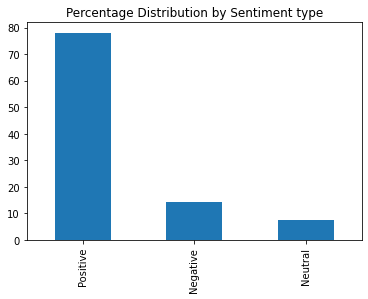

In [16]:
# Checking the percentage distribution by sentiment type visually.

print('Percentage for default\n')
print(round(data.Sentiment.value_counts(normalize=True)*100,2))
round(data.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by Sentiment type')
plt.show()

In [17]:
# Apply first level cleaning
import re 
import string

# This function converts to lower-case, removes square bracket, removes numbers and punctuations

def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x : text_clean_1(x)

In [18]:
# updated text

data['cleaned_description']=pd.DataFrame(data.Text.apply(cleaned1))
data.cleaned_description

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give  of thos...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: cleaned_description, Length: 568411, dtype: object

In [19]:
# Applying second round of cleaning to remove commas and newlines

def text_clean_2(text):
    text=re.sub('[''""]','',text)
    text=re.sub('\n','',text)
    return text
cleaned2=lambda x : text_clean_2(x)

In [20]:
data['Cleaned_description_new']=pd.DataFrame(data['cleaned_description'].apply(cleaned2))
data.Cleaned_description_new

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give  of thos...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: Cleaned_description_new, Length: 568411, dtype: object

# Algorithm For The Model

I am choosing Logistic Regression model for doing this model. Logistic Regression is useful for 
sentimental analysis as it uses a sigmoid function to output a probability between zero and 
one.
It is very effective on text data and this algorithm is also fairly easy to understand. It is a great 
smarter algorithm for text related classification

# Model Building

### Model Training

In [21]:
from sklearn.model_selection import train_test_split

x = data.Cleaned_description_new # Independent variable
y = data.Sentiment    # Dependent variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (454728,)
x_test : (113683,)
y_train : (454728,)
y_test : (113683,)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf2=LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [23]:
model=Pipeline([('vectorizer',tvec),('classifier', clf2)])

model.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix

y_pred=model.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[11819,  1793,  1866],
       [  787,  2147,   964],
       [ 3892,  4528, 85887]], dtype=int64)

TfidfVectorizer helps to convert raw document to a matrix of TF-IDF feature. Pipelines are 
used for splitting up the machine learning workflows into independent, reusable, modular 
parts that can then be pipelined together to continuously improve the accuracy of the model 
and achieve a successful algorithm.


### Model Prediction

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy :', accuracy_score(y_pred,y_test))
print('Precision :',precision_score(y_pred,y_test,average='weighted'))
print('Recall :',recall_score(y_pred,y_test,average='weighted'))

Accuracy : 0.8783459268316283
Precision : 0.909329235937707
Recall : 0.8783459268316283


### Trying on new reviews

In [25]:
example = ['I am happy']
result = model.predict(example)
print(result)

['Positive']


In [29]:
example = ['I am frustrated']
result = model.predict(example)
print(result)

['Negative']


In [30]:
example = ['The product was awesome']
result = model.predict(example)
print(result)

['Positive']


In [32]:
example = ['"Delight" says it all']
result = model.predict(example)
print(result)

['Positive']
